In [1]:
# Deprecated ipynb file.
import cppyy
import ctypes
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline
cppyy.include(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\SDM274_ML_AI\LinearAutoEncoder\src\LinearAutoEncoder.h")

def get2DCppArray(X):
    if isinstance(X, np.ndarray):
        data_list = X.tolist()
    else:
        data_list = X 
    vector_vector_double = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]
    vector_double = cppyy.gbl.std.vector['double']
    inputs = vector_vector_double()
    for sample in data_list:
        sample_vector = vector_double()
        for feature in sample:
            sample_vector.push_back(feature)
        inputs.push_back(sample_vector)
    return inputs

def get1DCppArray(X):
    if isinstance(X, np.ndarray):
        data_list = X.tolist()
    else:
        data_list = X 
    vector_double = cppyy.gbl.std.vector['double']
    labels_vector = vector_double()
    for label in data_list:
        labels_vector.push_back(label)
    return labels_vector

def get1DPyarray(ctypes_array):
    # 获取Ctypes数组的长度
    length = len(ctypes_array)

    # 将Ctypes数组转换为NumPy数组
    numpy_array = np.fromiter(ctypes_array, dtype=np.float64, count=length)

    return numpy_array

# 其实这里是非线性的（）
class LinearEncoder:
    def __init__(self, epochs, learning_rate, inputSize, hidden):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.inputSize = inputSize
        self.model = cppyy.gbl.PY_LAE()
        hidden = cppyy.gbl.std.vector[int](hidden)
        self.model.selfInit(epochs, learning_rate, inputSize, hidden)
        
    def setLR_VOKE(self, LR_VOKE):
        self.model.setLR_VOKE(LR_VOKE)
        pass;
    
    def train(self, X, y):
        if isinstance(X, np.ndarray):
            data_list = X.tolist()
        else:
            data_list = X 

        if isinstance(y, np.ndarray):
            labels_list = y.tolist()
        else:
            labels_list = y
        
        # declare std::vector in python
        vector_vector_double = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]
        vector_double = cppyy.gbl.std.vector['double']

        # transverse inputs
        inputs = vector_vector_double()
        for sample in data_list:
            sample_vector = vector_double()
            for feature in sample:
                sample_vector.push_back(feature)
            inputs.push_back(sample_vector)

        # transverse labels
        labels_vector = get2DCppArray(labels_list)
        
        self.model.train(inputs, labels_vector)
        pass
    
    def predict(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.predict(X))
    
    def encode(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.encode(X))
        
    
    def decode(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.decode(X))
    
    def binaryDecode(self,X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.binaryDecode(X))

Load files.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline
size = 128
def getCVArray(path, title = 'avatar'):
    img = cv.imread(path,0)
    img = cv.resize(img, (size,size))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    img = img.astype(float)
    img /= 255.0
    # change to n*3 array
    img_arr = np.array(img)
    img_arr = np.resize(img_arr, (1,size*size))
    img_arr.astype(float)
    print(img_arr.shape)
    return img_arr[0]

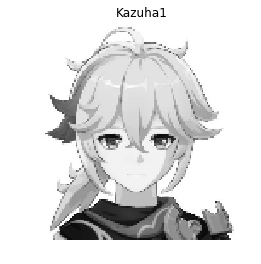

(1, 16384)


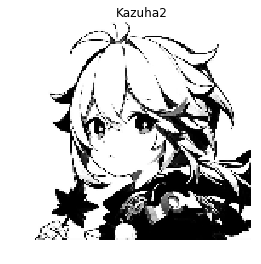

(1, 16384)


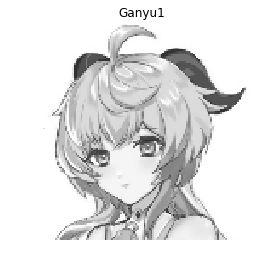

(1, 16384)


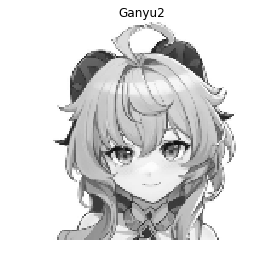

(1, 16384)


In [3]:

kazuha1 = getCVArray('statics/kazuha1.png','Kazuha1')
kazuha2 = getCVArray(r'D:\resource\mizh\kazuma.jpg','Kazuha2')
ganyu1 = getCVArray('statics/ganyu1.png','Ganyu1')
ganyu2 = getCVArray('statics/ganyu2.png','Ganyu2')

In [4]:
print(kazuha1)
train_data = [kazuha2, ganyu1]
train_data = np.array(train_data)
encoder = LinearEncoder(3000, 0.1, size*size, [20])
encoder.train(train_data, train_data)

[1.         1.         1.         ... 0.87058824 0.87058824 0.86666667]


[1.00000000e+000 3.41776424e-060 1.65408220e-004 1.00000000e+000
 1.37424387e-272 1.76196938e-010 1.00000000e+000 1.00000000e+000
 4.66166096e-015 3.35524980e-035 1.94649229e-034 7.60091564e-043
 1.00000000e+000 8.65022379e-013 1.31453735e-022 1.00000000e+000
 1.00000000e+000 1.65261591e-010 5.11283113e-071 1.00000000e+000]


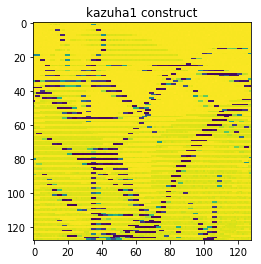

NameError: name 'kazuha_encode1' is not defined

In [5]:
kazuha_encode2 = encoder.encode(kazuha2)
print(kazuha_encode2)
# kazuha_encode2 = encoder.encode(kazuha2)
# ganyu_encode1 = encoder.encode(ganyu1)
# ganyu_encode2 = encoder.encode(ganyu2)
kazuha1_construct = encoder.decode(kazuha_encode2)
kazuha1_construct = np.resize(kazuha1_construct, (size, size))
plt.imshow(kazuha1_construct)
plt.title('kazuha1 construct')
    # plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

k_train_data = np.array([kazuha_encode1, kazuha_encode2, ganyu_encode1, ganyu_encode2])
from py.mKMeans import KMeansPlus, KMeans, SoftKMeans, EnhancedKMeans
kmeans = KMeans(k=2)
kmeans.fit(k_train_data)
print(kmeans.centroids)

In [ ]:
test_data = kazuha_encode1
print(test_data.shape)
test_output = kmeans.predict(test_data)
print(test_output)

test_output = encoder.encode(kazuha1)
test_construct = encoder.decode(test_output)
test_construct = np.resize(test_construct, (size,size))

plt.imshow(test_construct)
plt.title('predict construct')
    # plt.axis('off')  # Turn off axis numbers and ticks
plt.show()